필기체 인식 모델을 순차모델을 사용해 클래스로 만들어봅시다.

Using TensorFlow backend.


train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8
train_labels <class 'numpy.ndarray'> (60000,) uint8
test_images <class 'numpy.ndarray'> (10000, 28, 28) uint8
test_labels <class 'numpy.ndarray'> (10000,) uint8


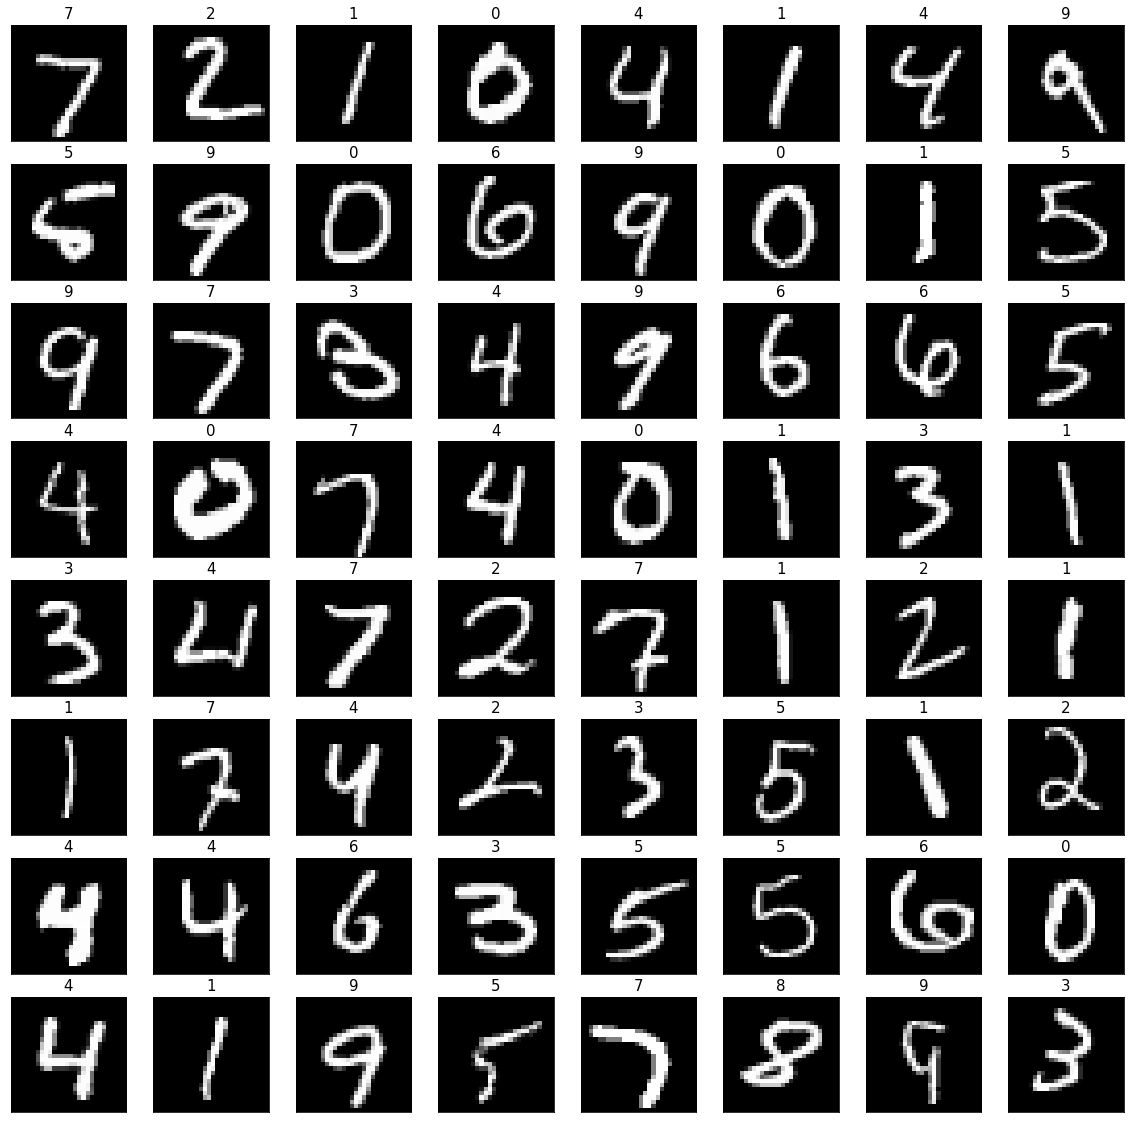

In [1]:
from keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'train_labels', type(train_labels), train_labels.shape, train_labels.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )
print( 'test_labels', type(test_labels), test_labels.shape, test_labels.dtype )

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( test_labels[i], {'fontsize':15} )
    plt.imshow( test_images[i], cmap="gray" )

In [2]:
_, h, w = train_images.shape
train_x = ( train_images.reshape(-1, h * w) / 255 ).astype('float32')
test_x = ( test_images.reshape(-1, h * w) / 255 ).astype('float32')
print( 'test_x', type(test_x), test_x.shape, test_x.dtype )

test_x <class 'numpy.ndarray'> (10000, 784) float32


In [3]:
num_classes = 10

print( 'test_labels', test_labels.shape, test_labels.dtype )
print( 'test_labels[0] =', test_labels[0] )

train_y = utils.to_categorical(train_labels, num_classes)
test_y = utils.to_categorical(test_labels, num_classes)

print( 'test_y', test_y.shape, test_y.dtype )
print( 'test_y[0] =', test_y[0] )

test_labels (10000,) uint8
test_labels[0] = 7
test_y (10000, 10) float32
test_y[0] = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


다음과 같이 순차 모델을 사용하여 클래스로 만듭니다.

In [4]:
class MNISTModel(models.Sequential):
    def __init__(self, Ni, Nh, No):
        super().__init__()
        self.add( layers.Dense(Nh, activation='relu', input_shape=(Ni,)) )
        self.add( layers.Dense(No, activation='softmax') )
        self.compile(optimizer='adam', loss='categorical_crossentropy',
                     metrics=['accuracy'])

혹은 다음과 같이 함수형 모델을 사용하여 클래스로 만듭니다.

In [5]:
class MNISTModel(models.Model):
    def __init__(self, Ni, Nh, No):
        x = layers.Input((Ni,))
        h = layers.Dense(Nh, activation='relu')(x)
        y = layers.Dense(No, activation='softmax')(h)
        super().__init__(x, y)
        self.compile(optimizer='adam', loss='categorical_crossentropy',
                     metrics=['accuracy'])

다음과 같이 클래스화 된 모델을 사용합니다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 1s 17us/step - loss: 0.4294 - acc: 0.8814 - val_loss: 0.2226 - val_acc: 0.9373
Epoch 2/15
48000/48000 [==============================] - 1s 14us/step - loss: 0.1982 - acc: 0.9439 - val_loss: 0.1680 - val_acc: 0.9522
Epoch 3/15
48000/48000 [==============================] - 1s 13us/step - loss:

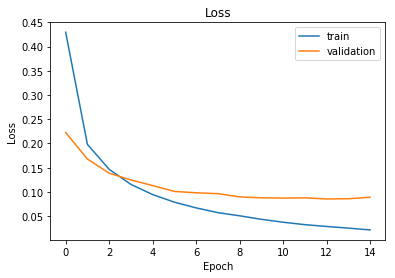

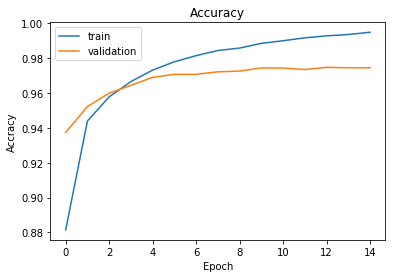

10000/10000 [==============================] - 0s 6us/step
[loss, accuracy] = [0.08201333047151566, 0.9759]


In [6]:
model = MNISTModel(h*w, 100, num_classes)
model.summary()
hist = model.fit(train_x, train_y, epochs=15, batch_size=128, validation_split=0.2)

from modules.plot_history import plot_loss, plot_acc
plot_loss(hist, 'Loss')
plt.show()
plot_acc(hist, 'Accuracy')
plt.show()

evaluation = model.evaluate( test_x, test_y, batch_size=128)
print( '[loss, accuracy] =', evaluation )

y_pred (10000, 10) float32
y_pred[0] [4.8308823e-07 3.7527594e-09 2.0709493e-05 6.0371123e-03 4.2168023e-11
 8.2683185e-09 3.8152259e-12 9.9393541e-01 2.0749794e-06 4.1470844e-06]
class_pred (10000,) int64
class_pred[0] 7


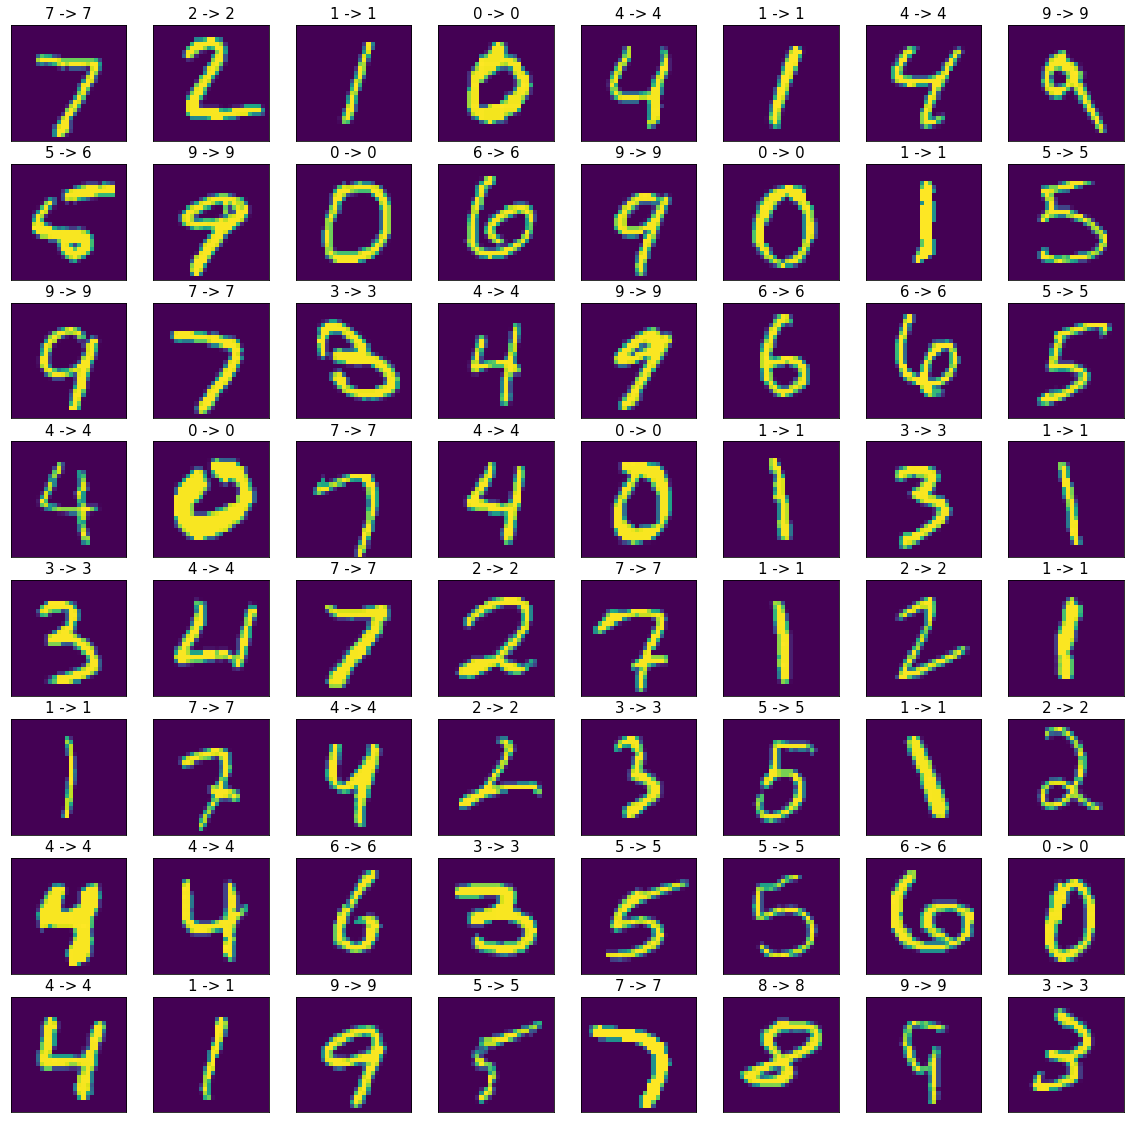

In [7]:
y_pred = model.predict(test_x)
print('y_pred', y_pred.shape, y_pred.dtype)
print('y_pred[0]', y_pred[0])

#class_pred = model.predict_classes( test_x ) # only for sequential model
class_pred = np.argmax(y_pred, axis=1)
print('class_pred', class_pred.shape, class_pred.dtype)
print('class_pred[0]', class_pred[0])

plt.figure( figsize=(20,20) )
for i in range(0,8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( str(test_labels[i]) + ' -> ' + str(class_pred[i]), {'fontsize':15} )
    plt.imshow( test_images[i] )